In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [4]:
norm = 'robnorm'
SAVE_NAME = norm + '_1e-3'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

## Train valid split

In [5]:
# train_label = pd.read_csv('./csv/trainMatrix.csv')
# train_label = train_label.set_index('id')
# train_label

In [6]:
# val_label = pd.read_csv('./csv/validMatrix.csv')
# val_label = val_label.set_index('id')
# val_label

In [7]:
# test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
# test_label = test_label.set_index('filename')
# test_label

In [8]:
# train_data = pd.read_csv('./csv/computed_' + norm + '_2018.csv')
# train_data = train_data.set_index('Movie')
# train_data

In [9]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [10]:
# test_data = pd.read_csv('./csv/computed_' + norm + '_2019.csv')
# test_data = test_data.set_index('Movie')
# test_data

In [11]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [12]:
# val_data = train_data.loc[val_label.index, :]
# train_data = train_data.drop(val_label.index)
# print(train_data.shape, val_data.shape, test_data.shape)
# print(train_label.shape, val_label.shape, test_label.shape)

In [13]:
# train_x = train_data.iloc[:, 8:].to_numpy()
# val_x = val_data.iloc[:, 8:].to_numpy()
# test_x = test_data.iloc[:, 8:].to_numpy()

# train_y = train_label.to_numpy()
# val_y = val_label.to_numpy()
# test_y = test_label.to_numpy()

# print(train_x.shape, train_y.shape)
# print(val_x.shape, val_y.shape)
# print(test_x.shape, test_y.shape)

## Random split valid

In [75]:
train_data = pd.read_csv('./csv/computed_minmaxnorm_2018.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_minmaxnorm,A_std_minmaxnorm,B_avg_minmaxnorm,B_std_minmaxnorm,C_avg_minmaxnorm,C_std_minmaxnorm,D_avg_minmaxnorm,D_std_minmaxnorm
Movie,,,,,,,,,,,,,,,,
tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.047121,0.037375,0.007537,0.000935,0.424876,0.817968,0.794498,0.747546
tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,0.096247,0.088370,0.001071,0.000357,0.099603,0.372418,0.487130,0.290240
tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,0.008437,0.002121,0.003267,0.000840,0.331324,0.789032,0.338127,0.303817
tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,0.017297,0.009813,0.006058,0.002368,0.396702,0.803111,0.389316,0.518374
tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,0.005249,0.009465,0.011846,0.003083,0.369907,0.759558,0.393670,0.359121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,0.107137,0.039623,0.001049,0.000280,0.121906,0.370990,0.513835,0.591434
tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,0.055626,0.022940,0.001797,0.000334,0.043146,0.129630,0.160247,0.184053
tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,0.009119,0.005131,0.007679,0.001812,0.296684,0.686867,0.409592,0.449184


In [15]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [76]:
train_label = pd.read_csv('./csv/filename2genreMat_2018.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt0328810,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
tt10005184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt10017502,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
tt10043732,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt10048096,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
tt9879080,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9891764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
test_data = pd.read_csv('./csv/computed_robnorm_2019.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_robnorm,A_std_robnorm,B_avg_robnorm,B_std_robnorm,C_avg_robnorm,C_std_robnorm,D_avg_robnorm,D_std_robnorm
Movie,,,,,,,,,,,,,,,,
47metersdown,34.804878,23.842184,1.193778e+07,3.062201e+07,0.245609,0.249743,3832.149222,3285.912168,-0.163256,-0.480021,0.911054,0.680381,0.047447,-0.349993,0.130579,1.240680
adogsjourneymovie,34.632479,29.109753,2.688809e+06,4.606428e+06,0.335994,0.349169,3225.348525,2086.338316,-0.180665,-0.229981,-0.207987,-0.373099,1.091339,1.541336,-0.249141,-0.423865
aftermathmovie,35.692308,26.611911,7.378430e+05,1.447868e+06,0.204298,0.259951,3212.997036,2613.398542,-0.073642,-0.348548,-0.444036,-0.501002,-0.429664,-0.155797,-0.256870,0.307491
aftermovie,58.276596,54.904056,5.730162e+06,1.429929e+07,0.212974,0.231655,3180.640515,2106.905407,2.206959,0.994421,0.159989,0.019405,-0.329459,-0.694064,-0.277118,-0.395326
alitamovie,35.784314,29.192272,2.531455e+06,6.295080e+06,0.267326,0.269637,2845.366841,2350.313592,-0.064351,-0.226064,-0.227025,-0.304719,0.298272,0.028445,-0.486924,-0.057569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,43.010204,52.851833,2.255390e+06,6.467894e+06,0.175808,0.220674,3444.948763,3236.149083,0.665332,0.897006,-0.260426,-0.297721,-0.758705,-0.902950,-0.111721,1.171628
whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,-0.437717,-0.680140,1.890940,1.576863,0.000000,-0.136419,1.491222,0.264281
wonderparkmovie,27.282443,13.193380,1.579958e+08,4.421705e+08,0.431886,0.331712,5554.107410,2757.092203,-0.922885,-0.985498,18.582740,17.345700,2.198814,1.209258,1.208136,0.506882


In [18]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [45]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
train_label = train_label.loc[train_data.index, :]
train_label.to_csv('./csv/train_label_2018_filtered.csv', index = 0)

In [49]:
print(train_data.shape,test_data.shape)
print(train_label.shape,test_label.shape)
# print(train_data.isnull().sum())
# print(test_data.isnull().sum())

(1320, 16) (97, 16)
(1320, 20) (97, 20)


In [50]:
val_data = train_data.sample(frac = 0.2,random_state = 42)
train_data = train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(1056, 16) (264, 16)


In [51]:
val_label = train_label.loc[val_data.index, :]
train_label = train_label.drop(val_data.index)
print(train_label.shape, val_label.shape)

(1056, 20) (264, 20)


In [52]:
train_x = train_data.iloc[:, 8:].to_numpy()
val_x = val_data.iloc[:, 8:].to_numpy()
test_x = test_data.iloc[:, 8:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(1056, 8) (1056, 20)
(264, 8) (264, 20)
(97, 8) (97, 20)


# Model start

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (8, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                660       
Total params: 12,148
Trainable params: 12,148
Non-trainable params: 0
_________________________________________________________________


In [55]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Train on 1056 samples, validate on 264 samples
Epoch 1/100
1056/1056 [==============================] - 0s 194us/step - loss: 0.5413 - acc: 0.8019 - val_loss: 0.3789 - val_acc: 0.8858
Epoch 2/100
1056/1056 [==============================] - 0s 67us/step - loss: 0.3418 - acc: 0.8893 - val_loss: 0.3281 - val_acc: 0.8896
Epoch 3/100
1056/1056 [==============================] - 0s 67us/step - loss: 0.3212 - acc: 0.8909 - val_loss: 0.3251 - val_acc: 0.8896
Epoch 4/100
1056/1056 [==============================] - 0s 67us/step - loss: 0.3197 - acc: 0.8909 - val_loss: 0.3243 - val_acc: 0.8894
Epoch 5/100
1056/1056 [==============================] - 0s 67us/step - loss: 0.3196 - acc: 0.8898 - val_loss: 0.3250 - val_acc: 0.8860


In [56]:
# save model weights
model.save(WEIGHTS_SAVE)

In [57]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

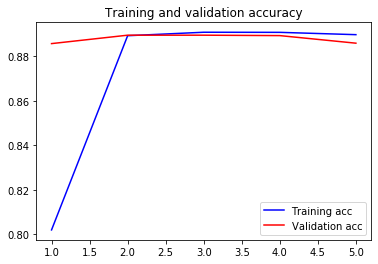

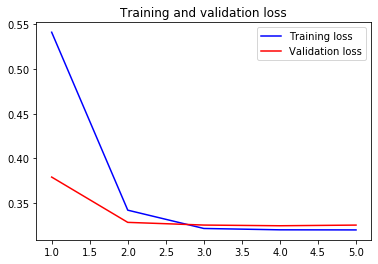

In [58]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [59]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 332us/step


In [60]:
pred.shape

(97, 20)

In [61]:
results=pd.DataFrame(pred, columns=columns)
results["username"] = test_data.index
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [62]:
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,2.234894e-01,0.178500,0.175677,0.186403,0.265617,0.174081,0.130248,0.547178,0.150592,...,0.156213,0.185294,0.181906,0.139470,1.912757e-01,0.130115,0.137992,2.166230e-01,0.154461,0.165805
1,adogsjourneymovie,3.316163e-01,0.240145,0.236212,0.253498,0.344652,0.255960,0.185228,0.430398,0.218291,...,0.232049,0.246600,0.223899,0.195423,2.847079e-01,0.214835,0.166715,3.849138e-01,0.264622,0.234753
2,aftermathmovie,4.497230e-01,0.391962,0.408982,0.419923,0.439732,0.413363,0.392047,0.471632,0.402269,...,0.399130,0.433895,0.423826,0.418652,4.372649e-01,0.394087,0.375893,4.838958e-01,0.407748,0.432294
3,aftermovie,1.679659e-01,0.071954,0.090189,0.152330,0.207414,0.129985,0.092744,0.523375,0.088961,...,0.087493,0.125265,0.076923,0.089342,1.513390e-01,0.106030,0.095739,1.536901e-01,0.074215,0.054166
4,alitamovie,4.360190e-01,0.380683,0.415175,0.440242,0.465449,0.429100,0.401423,0.482515,0.410215,...,0.406857,0.433484,0.404026,0.427570,4.230900e-01,0.402264,0.380649,4.852415e-01,0.430782,0.408432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,2.770944e-01,0.173418,0.199102,0.253169,0.321984,0.231839,0.167345,0.535290,0.175608,...,0.170920,0.238720,0.197800,0.178789,2.331212e-01,0.182418,0.177469,2.428650e-01,0.168057,0.174253
93,whatmenwant,1.057892e-01,0.064991,0.058305,0.065484,0.145277,0.058581,0.033969,0.566035,0.042492,...,0.047296,0.067165,0.063109,0.032554,7.114220e-02,0.038173,0.036997,9.434122e-02,0.043950,0.049520
94,wonderparkmovie,2.384186e-07,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.946055,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.940697e-08,0.000000,0.000000,2.086163e-07,0.000000,0.000000
95,xmenmovies,3.447155e-01,0.247009,0.288203,0.328928,0.386658,0.291194,0.270927,0.475375,0.260242,...,0.278048,0.313200,0.281124,0.292404,3.161649e-01,0.289435,0.252260,3.763393e-01,0.281611,0.242539


## Label top n dynamic

In [63]:
true_df = test_label
true_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results = results.set_index('username')
results

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
username,,,,,,,,,,,,,,,,,,,,
47metersdown,2.234894e-01,0.178500,0.175677,0.186403,0.265617,0.174081,0.130248,0.547178,0.150592,0.146577,0.156213,0.185294,0.181906,0.139470,1.912757e-01,0.130115,0.137992,2.166230e-01,0.154461,0.165805
adogsjourneymovie,3.316163e-01,0.240145,0.236212,0.253498,0.344652,0.255960,0.185228,0.430398,0.218291,0.284367,0.232049,0.246600,0.223899,0.195423,2.847079e-01,0.214835,0.166715,3.849138e-01,0.264622,0.234753
aftermathmovie,4.497230e-01,0.391962,0.408982,0.419923,0.439732,0.413363,0.392047,0.471632,0.402269,0.449809,0.399130,0.433895,0.423826,0.418652,4.372649e-01,0.394087,0.375893,4.838958e-01,0.407748,0.432294
aftermovie,1.679659e-01,0.071954,0.090189,0.152330,0.207414,0.129985,0.092744,0.523375,0.088961,0.093661,0.087493,0.125265,0.076923,0.089342,1.513390e-01,0.106030,0.095739,1.536901e-01,0.074215,0.054166
alitamovie,4.360190e-01,0.380683,0.415175,0.440242,0.465449,0.429100,0.401423,0.482515,0.410215,0.440844,0.406857,0.433484,0.404026,0.427570,4.230900e-01,0.402264,0.380649,4.852415e-01,0.430782,0.408432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,2.770944e-01,0.173418,0.199102,0.253169,0.321984,0.231839,0.167345,0.535290,0.175608,0.197054,0.170920,0.238720,0.197800,0.178789,2.331212e-01,0.182418,0.177469,2.428650e-01,0.168057,0.174253
whatmenwant,1.057892e-01,0.064991,0.058305,0.065484,0.145277,0.058581,0.033969,0.566035,0.042492,0.045647,0.047296,0.067165,0.063109,0.032554,7.114220e-02,0.038173,0.036997,9.434122e-02,0.043950,0.049520
wonderparkmovie,2.384186e-07,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.946055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.940697e-08,0.000000,0.000000,2.086163e-07,0.000000,0.000000


In [65]:
labels = read_json('../genresDic.json')

In [66]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [67]:
li = []
for i, row in true_df.iterrows():
    username = i.split('.')[0]
#     if username == results.loc[i,:]['username']: # username equals
    print(i, username)
    truth = labels[username]
    numTrue = sum(row)
    print('count:', numTrue)

    s = results.loc[username,:]
    top_n = s.sort_values(ascending=False)[:numTrue]
    inList = list(top_n.index)

    onehot = []
    for g in columns:
        onehot.append(int(g in inList))

    acc = countAcc(inList, truth)
    print(acc, inList, truth)

    appList = [username, acc, truth, inList] + onehot
    li.append(appList)
        

47metersdown.mp4 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Drama', 'Horror']
adogsjourneymovie.mp4 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Thriller', 'Comedy'] ['Adventure', 'Comedy', 'Drama']
aftermathmovie.mp4 aftermathmovie
count: 3
0.3333333333333333 ['Thriller', 'Drama', 'Fantasy'] ['Drama', 'Romance', 'War']
aftermovie.mp4 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
alitamovie.mp4 alitamovie
count: 3
0.0 ['Thriller', 'Drama', 'Comedy'] ['Action', 'Adventure', 'Sci-Fi']
angelhasfallen.mp4 angelhasfallen
count: 2
0.5 ['Drama', 'Thriller'] ['Action', 'Thriller']
angrybirdsmovie.mp4 angrybirdsmovie
count: 3
0.0 ['Drama', 'Western', 'War'] ['Adventure', 'Animation', 'Comedy']
annabellemovie.mp4 annabellemovie
count: 3
0.3333333333333333 ['Drama', 'Thriller', 'Comedy'] ['Horror', 'Mystery', 'Thriller']
annamovie.mp4 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
apollo11movie.mp4 apollo

In [68]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Thriller, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Thriller, Drama, Fantasy]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.000000,"[Action, Adventure, Sci-Fi]","[Thriller, Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.000000,"[Horror, Mystery, Thriller]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,wonderparkmovie,0.333333,"[Adventure, Animation, Comedy]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.000000,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Thriller]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [70]:
acc_df['acc'].mean()

0.359106529209622